In [9]:
# Resolver o PVI
# y'(t) = y(t)
# y(0) = 1
# y(1) = ?
w0 = 1
h = 0.25
w1 = w0 + h*w0
w2 = w1 + h*w1
w3 = w2 + h*w2
w4 = w3 + h*w3
println("Erro = ", e - w4)

Erro = 0.2768755784590451


In [18]:
# Resolver o PVI
# y'(t) = t*y(t)
# y(0) = 1
# y(1) = ?
f(t,y) = t*y
w0 = 1
n = 4
t = linspace(0, 1, n+1) # ou t = 0.0:h:1.0
h = 1.0/n
w1 = w0 + h*f(t[1],w0) # Elemento
w2 = w1 + h*f(t[2],w1) # a
w3 = w2 + h*f(t[3],w2) # elemento
w4 = w3 + h*f(t[4],w3)
println("Erro = ", exp(0.5) - w4)

Erro = 0.2292876769501282


In [22]:
# Resolver o PVI
# y'(t) = t*y(t)
# y(0) = 1
# y(1) = ?
f(t,y) = t*y
n = 4
t = linspace(0, 1, n+1) # ou t = 0.0:h:1.0
w = zeros(n+1) # Vetor
w[1] = 1
h = 1.0/n

w[2] = w[1] + h*f(t[1],w[1])
w[3] = w[2] + h*f(t[2],w[2])
w[4] = w[3] + h*f(t[3],w[3])
w[5] = w[4] + h*f(t[4],w[4])
println("Erro = ", exp(0.5) - w[5])

Erro = 0.2292876769501282


In [33]:
# Resolver o PVI
# y'(t) = t*y(t)
# y(0) = 1
# y(1) = ?
f(t,y) = t*y
n = 40
t = linspace(0, 1, n+1) # ou t = 0.0:h:1.0
w = zeros(n+1) # Vetor
w[1] = 1
h = 1.0/n

for i = 1:n
    w[i+1] = w[i] + h*f(t[i],w[i])
end

println("Erro = ", exp(0.5) - w[n+1])

Erro = 0.02692057647129653


In [45]:
# Resolver o PVI
# y'(t) = f(t,y)
# y(t0) = y0
# y(tf) = ?
function euler_explicito(f, t0, y0, tf; n = 40)
    t = linspace(t0, tf, n+1) # ou t = 0.0:h:1.0
    w = zeros(n+1) # Vetor
    w[1] = y0
    h = (tf-t0)/n

    for i = 1:n
        w[i+1] = w[i] + h*f(t[i],w[i])
    end

    return w
end

euler_explicito (generic function with 1 method)

In [53]:
f(t,y) = y
t0 = 1
y0 = e
tf = 2
w = euler_explicito(f, t0, y0, tf, n = 10);
w[end] - e^2

-0.338533101938161

In [52]:
Pkg.add("Winston")
using Winston

In [55]:
# Retornando t e w para plotar
function euler_explicito(f, t0, y0, tf; n = 40)
    t = linspace(t0, tf, n+1) # ou t = 0.0:h:1.0
    w = zeros(n+1) # Vetor
    w[1] = y0
    h = (tf-t0)/n

    for i = 1:n
        w[i+1] = w[i] + h*f(t[i],w[i])
    end

    return t, w
end

euler_explicito (generic function with 1 method)

INFO: Nothing to be done


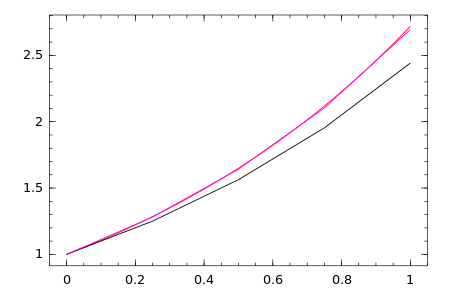

INFO: METADATA is out-of-date — you may not have the latest version of Winston
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [69]:
Pkg.add("Winston")
using Winston

f(t,y) = y
t0 = 0
y0 = 1
tf = 1
t, w = euler_explicito(f, t0, y0, tf, n = 4);
t, w2 = euler_aperf(f, t0, y0, tf, n = 4);

# Solucao
y(t) = exp(t)

fplot(y, [t0, tf], "r")
oplot(t, w)
oplot(t, w2, "m")

In [67]:
# Retornando t e w para plotar
function euler_aperf(f, t0, y0, tf; n = 40)
    t = linspace(t0, tf, n+1) # ou t = 0.0:h:1.0
    w = zeros(n+1) # Vetor
    w[1] = y0
    h = (tf-t0)/n

    for i = 1:n
        θ = f(t[i],w[i])
        κ = w[i] + h*θ
        w[i+1] = w[i] + 0.5h*(θ + f(t[i+1],κ))
    end

    return t, w
end

euler_aperf (generic function with 1 method)